<a href="https://colab.research.google.com/github/edwinsn/Object-detection/blob/main/coil_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
%tensorflow_version 2.x
from matplotlib import pyplot as plt
from tensorflow.keras import models,backend,layers,models
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras.callbacks import EarlyStopping
import numpy as np
from sklearn.model_selection import train_test_split
from os import scandir
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os

# replace with the database's path 
path="/content/drive/MyDrive/coil-100/"
files=[]
i=0
for arc in os.listdir(path):
  i+=1
  if arc[-1]=="g" and i%5==0:
    files.append(arc)

files.sort()
files=files[:300]

In [52]:
#guardado de imagenes

x=[]
y=[]

for fil in files:
  image = load_img(path+fil, target_size=(224, 224))
  image = img_to_array(image)
  image = image.reshape((image.shape[0], image.shape[1], image.shape[2]))

  x.append(image)
  label=fil.split("_")[0]
  label=label.split("j")[1]
  y.append( int(label) )

#codificación de etiquetas

xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size=0.2)

xTrain= np.array(xTrain)
yTrain=  np.array(yTrain)
xTest= np.array(xTest)
yTest=  np.array(yTest)

plt.figure(figsize=(18,18))

<Figure size 1296x1296 with 0 Axes>

<Figure size 1296x1296 with 0 Axes>

In [53]:
model=models.Sequential([
                               layers.Conv2D(40,kernel_size=3,strides=1,padding='same',activation='relu',kernel_initializer='he_uniform',input_shape=(224,224,3)),
                               layers.MaxPool2D(pool_size=2),
                               layers.Conv2D(80,kernel_size=3,strides=1,padding='valid',activation='relu',kernel_initializer='he_uniform'),
                               layers.MaxPool2D(pool_size=2),
                               layers.Conv2D(100,kernel_size=3,strides=2,padding='valid',activation='relu',kernel_initializer='he_uniform'),
                               layers.MaxPool2D(pool_size=2),
                               layers.Flatten(),
                               layers.Dense(50,activation='relu',kernel_initializer='he_uniform'),
                               layers.Dense(20,activation='relu',kernel_initializer='he_uniform'),
                               layers.Dense(101,activation='softmax')
])

model.compile('adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [54]:
history=model.fit(xTrain,yTrain,epochs=20,validation_data=(xTest,yTest))

Epoch 1/20
8/8 [==============================] - 24s 3s/step - loss: 138.5654 - acc: 0.0333 - val_loss: 12.0654 - val_acc: 0.0167
Epoch 2/20
8/8 [==============================] - 23s 3s/step - loss: 5.9694 - acc: 0.0375 - val_loss: 4.3324 - val_acc: 0.0833
Epoch 3/20
8/8 [==============================] - 23s 3s/step - loss: 3.6257 - acc: 0.2208 - val_loss: 3.0578 - val_acc: 0.3167
Epoch 4/20
8/8 [==============================] - 23s 3s/step - loss: 1.9992 - acc: 0.4875 - val_loss: 2.3984 - val_acc: 0.4500
Epoch 5/20
8/8 [==============================] - 23s 3s/step - loss: 1.2065 - acc: 0.6958 - val_loss: 1.7554 - val_acc: 0.6000
Epoch 6/20
8/8 [==============================] - 23s 3s/step - loss: 0.6762 - acc: 0.8375 - val_loss: 1.5503 - val_acc: 0.6667
Epoch 7/20
8/8 [==============================] - 23s 3s/step - loss: 0.2857 - acc: 0.9375 - val_loss: 1.1347 - val_acc: 0.7833
Epoch 8/20
8/8 [==============================] - 23s 3s/step - loss: 0.1297 - acc: 0.9667 - val_loss

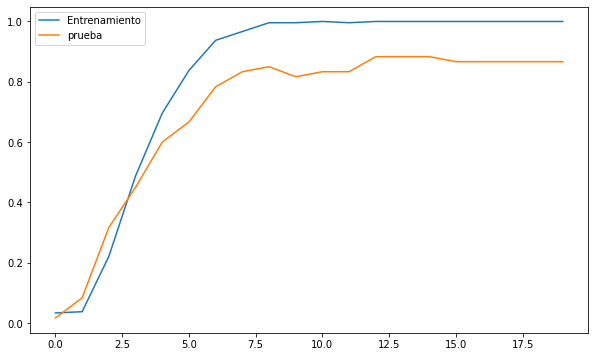

In [55]:
plt.figure(figsize=(10,6))

plt.plot(history.history['acc'], label='Entrenamiento')
plt.plot(history.history['val_acc'], label='prueba')
plt.legend()
plt.show()

The model says that this two objects are the same


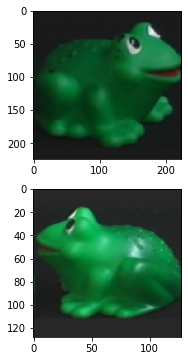

In [70]:
image=load_img(path+files[-1],target_size=(224, 224))
plt.figure(figsize=(10,6))
plt.subplot(211)
plt.imshow(image)
image = img_to_array(image)
image = image.reshape((1,image.shape[0], image.shape[1], image.shape[2]))
pre=model.predict(image)
plt.subplot(212)
image2=load_img(path+"obj"+str(np.argmax(pre,axis=1)[0])+"__0.png")
plt.imshow(image2)
print("The model says that this two objects are the same")